### **Linear Regression with one variable**

Data Generation for a single feature!

In [27]:
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 


sample_size = 100

x = np.linspace(0.0,1,sample_size) 
noise = np.random.randn(len(x)) 
th = 5

print("Theta : " + str(th))
print("Noise : " + str(np.mean(noise)))

y = th*x + 2*noise

Theta : 5
Noise : -0.05682070303605791


In [28]:
data = np.column_stack((x, noise, y)) 
data_df = pd.DataFrame({'X': data[:, 0], 'Noise(taken as a feature)': data[:, 1], 'Y': data[:, 2]})
data_df.head()

,X,Noise(taken as a feature),Y
0,0.000000,-0.750832,-1.501665
1,0.010101,-1.099868,-2.149231
2,0.020202,0.462870,1.026750
3,0.030303,0.750872,1.653258
4,0.040404,0.061306,0.324632


Text(0, 0.5, 'Y')

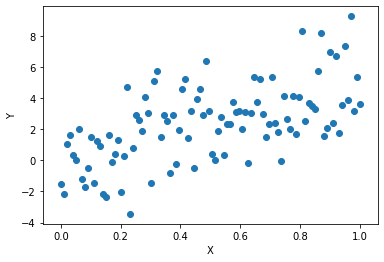

In [29]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

In [30]:
from sklearn import preprocessing

Predicted Theta : 5.051275684094617
Predicted Noise : -0.13927924811861983


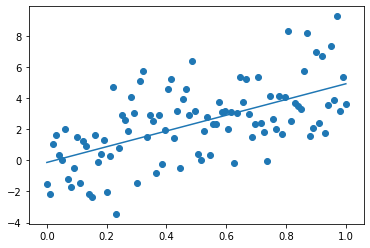

In [31]:
theta_1 = np.random.uniform(1)
theta_0 = np.random.uniform(1) 


z = 0.38

hyp_fun = theta_1*x + theta_0
cost_fn = (1/(2*sample_size))*np.sum((hyp_fun - y)**2)

temp = np.ones(2)

for i in range(1000):
    temp[0] = theta_1 - z*(1/sample_size)*(np.sum((hyp_fun - y)*x))
    temp[1]= theta_0 - z*(1/sample_size)*(np.sum(hyp_fun - y))
    
    theta_0 = temp[1]
    theta_1 = temp[0]
    hyp_fun = theta_1*x + theta_0
    cost_fn = (1/(2*sample_size))*np.sum((hyp_fun - y)**2)

print("Predicted Theta : " + str(theta_1))

print("Predicted Noise : " + str(theta_0))

plt.scatter(x,y)    
plt.plot(x,hyp_fun)
     

### **Linear Regression with multiple variables**

Data Generation for three features!

In [33]:
%matplotlib inline 

sample_size = 100

x0 = np.ones(100, dtype = int)
x0 = x0.reshape(100,1)

x1_size = np.random.randint(1000,5000,sample_size) 
x1 = x1_size.reshape(100,1)

x2_rooms = np.random.randint(3,10,sample_size)
x2 = x2_rooms.reshape(100,1)

x3_bed = np.random.randint(2,5,sample_size)
x3 = x3_bed.reshape(100,1)

noise = np.random.randn(len(x0))

noise = noise.reshape(100,1)

# Normalization

x1 = (x1 - min(x1))/(max(x1) - min(x1))
x2 = (x2 - min(x2))/(max(x2) - min(x2))
x3 = (x3 - min(x3))/(max(x3) - min(x3))


ft_matrix = np.column_stack((x0, x1, x2, x3))
theta = np.array([0, 5, 3, 2])
theta = theta.reshape(4,1)
y = ft_matrix.dot(theta)
y = y.reshape(100,1)

In [40]:
print(theta)

[[0]
 [5]
 [3]
 [2]]


In [37]:
data_ = np.column_stack((x1_size, x2_rooms, x3_bed, y)) 
data_df_ = pd.DataFrame({'Size': data_[:, 0], 'Rooms': data_[:, 1], '#Beds': data_[:, 2], 'Y(Price)': data_[:, 3]*10000})
data_df_.head()

,Size,Rooms,#Beds,Y(Price)
0,2977.0,5.0,4.0,54277.678343
1,4608.0,6.0,3.0,70129.122986
2,4823.0,7.0,3.0,77877.780619
3,3168.0,5.0,4.0,56719.509077
4,2199.0,6.0,2.0,29331.373050


In [39]:
theta_guess = np.array(np.random.randn(4))
theta_guess = theta_guess.reshape(4,1)

learning_rate = 0.01
  
hyp_fun = ft_matrix.dot(theta_guess) 

cost_fun = (1/(2*sample_size))*(np.sum((hyp_fun - y)**2))

temp = np.ones(4).reshape(4,1)

for i in range(10000):
    
    temp = theta_guess - (learning_rate*(1/sample_size)*(np.sum(((hyp_fun - y)*(ft_matrix)),axis=0))).reshape(4,1)
    theta_guess = temp

    hyp_fun = ft_matrix.dot(theta_guess)
    cost_fun = 1/(2*sample_size)*(np.sum((hyp_fun - y)**2))
    
    
print(theta_guess)
    

[[0.01313105]
 [4.98859501]
 [2.99305557]
 [1.99367423]]
